# Compare samplers

In this notebook, we'll compare the different samplers implemented in `tupak`. As of this version, we don't compare the outputs, only how to run them and the timings for their default setup.

## Setup

In [3]:
import numpy as np
import pylab as plt

%matplotlib inline

import tupak

tupak.utils.setup_logger()

time_duration = 1.
sampling_frequency = 4096.

injection_parameters = dict(mass_1=36., mass_2=29., a_1=0, a_2=0, tilt_1=0, tilt_2=0, phi_12=0, phi_jl=0,
                            luminosity_distance=100., iota=0.4, phase=1.3, waveform_approximant='IMRPhenomPv2',
                            reference_frequency=50., ra=1.375, dec=-1.2108, geocent_time=1126259642.413,
                            psi=2.659)

waveform_generator = tupak.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    time_duration=time_duration,
    frequency_domain_source_model=tupak.source.lal_binary_black_hole,
    parameters=injection_parameters)

hf_signal = waveform_generator.frequency_domain_strain()

H1 = tupak.detector.H1
H1.set_data(sampling_frequency=sampling_frequency, duration=time_duration,
            from_power_spectral_density=True)
H1.inject_signal(waveform_polarizations=hf_signal, parameters=injection_parameters)

IFOs = [H1]

likelihood = tupak.likelihood.Likelihood(IFOs, waveform_generator)

09:49 INFO    : Setting H1 data using noise realization from providedpower_spectal_density


## Prior

For this test, we will simply search of the sky position, setting the other parameters to their simulated values.

In [4]:
priors = tupak.prior.parse_floats_to_fixed_priors(injection_parameters)
priors['ra'] = tupak.prior.Uniform(0, 2*np.pi, 'ra')
priors['dec'] = tupak.prior.Uniform(-np.pi/2, np.pi/2, 'dec')

09:49 INFO    : Expected parameter waveform_approximant to be a float or int but was <type 'str'> instead. Will not be converted.


## PyMultinest

09:49 WARNING : waveform_approximant cannot be converted to delta function prior.
09:49 WARNING : If required the default prior will be used.
09:49 INFO    : Search parameters:
09:49 INFO    :   ra ~ Uniform(support=6.28318530718, minimum=0, name=ra, maximum=6.28318530718, _Prior__latex_label=$\mathrm{RA}$)
09:49 INFO    :   dec ~ Uniform(support=3.14159265359, minimum=-1.57079632679, name=dec, maximum=1.57079632679, _Prior__latex_label=$\mathrm{DEC}$)
09:49 INFO    :   psi = 2.659
09:49 INFO    :   a_2 = 0
09:49 INFO    :   a_1 = 0
09:49 INFO    :   geocent_time = 1126259642.41
09:49 INFO    :   reference_frequency = 50.0
09:49 INFO    :   phi_jl = 0
09:49 INFO    :   phase = 1.3
09:49 INFO    :   mass_2 = 29.0
09:49 INFO    :   mass_1 = 36.0
09:49 INFO    :   phi_12 = 0
09:49 INFO    :   luminosity_distance = 100.0
09:49 INFO    :   tilt_2 = 0
09:49 INFO    :   iota = 0.4
09:49 INFO    :   tilt_1 = 0
09:49 INFO    : Using sampler Pymultinest with kwargs {'importance_nested_sampling':

Writing priors to outdir/prior.txt


09:49 INFO    : Renaming existing file outdir/pymultinest_result.h5 to outdir/pymultinest_result.h5.old
09:49 INFO    : Saving result to outdir/pymultinest_result.h5


  analysing data from outdir/pymultinest_pymultinest/.txt


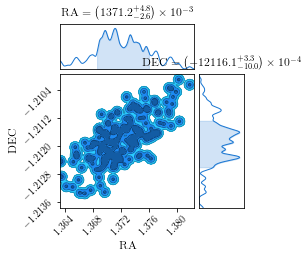

nsamples: 186
noise_logz: -27681.688
logz: -2143.922 +/-  0.252
log_bayes_factor: 25537.767 +/-  0.252

CPU times: user 11.9 s, sys: 1.1 s, total: 13 s
Wall time: 13.1 s


In [5]:
%%time 
result = tupak.sampler.run_sampler(
    likelihood, priors=priors, sampler='pymultinest', label='pymultinest',
    npoints=200, verbose=False, resume=False)
fig = result.plot_corner(save=False)
plt.show()
print(result)

# dynesty

09:49 WARNING : No default prior found for unspecified variable waveform_approximant.
09:49 WARNING : This variable will NOT be sampled.
09:49 INFO    : Search parameters:
09:49 INFO    :   ra ~ Uniform(support=6.28318530718, minimum=0, name=ra, maximum=6.28318530718, _Prior__latex_label=$\mathrm{RA}$)
09:49 INFO    :   dec ~ Uniform(support=3.14159265359, minimum=-1.57079632679, name=dec, maximum=1.57079632679, _Prior__latex_label=$\mathrm{DEC}$)
09:49 INFO    :   psi = 2.659
09:49 INFO    :   a_2 = 0
09:49 INFO    :   a_1 = 0
09:49 INFO    :   geocent_time = 1126259642.41
09:49 INFO    :   reference_frequency = 50.0
09:49 INFO    :   phi_jl = 0
09:49 INFO    :   phase = 1.3
09:49 INFO    :   mass_2 = 29.0
09:49 INFO    :   mass_1 = 36.0
09:49 INFO    :   phi_12 = 0
09:49 INFO    :   luminosity_distance = 100.0
09:49 INFO    :   tilt_2 = 0
09:49 INFO    :   iota = 0.4
09:49 INFO    :   tilt_1 = 0
09:49 INFO    : Using sampler Dynesty with kwargs {'dlogz': 0.1, 'verbose': False, 'bound

Writing priors to outdir/prior.txt


iter: 996 | bound: 4 | nc: 1 | ncall: 9243 | eff(%): 10.776 | loglstar:   -inf < 12037.340 <    inf | logz: 12027.149 +/-  0.202 | dlogz: 13550.032 >  0.100              /home/user1/anaconda2/lib/python2.7/site-packages/dynesty/sampling.py:218: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
iter: 3994+250 | bound: 147 | nc: 1 | ncall: 24445 | eff(%): 17.361 | loglstar:   -inf < 25551.669 <    inf | logz: 25538.075 +/-  0.224 | dlogz:  0.000 >  0.100            09:51 INFO    : Renaming existing file outdir/nestle_result.h5 to outdir/nestle_result.h5.old
09:51 INFO    : Saving result to outdir/nestle_result.h5


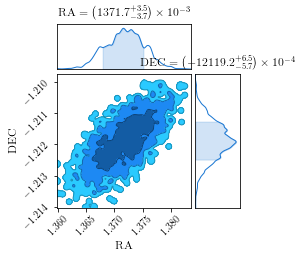

nsamples: 4244
noise_logz: -27681.688
logz: -2143.614 +/-  0.224
log_bayes_factor: 25538.075 +/-  0.224

CPU times: user 1min 14s, sys: 12.4 s, total: 1min 26s
Wall time: 1min 10s


In [6]:
%%time 
result = tupak.sampler.run_sampler(
    likelihood, priors=priors, sampler='dynesty', label='nestle',
    bound='multi', sample='rwalk', npoints=200, walks=1, verbose=False,
    update_interval=100)
fig = result.plot_corner(save=False)
plt.show()
print(result)

# ptemcee

09:51 WARNING : No default prior found for unspecified variable waveform_approximant.
09:51 WARNING : This variable will NOT be sampled.
09:51 INFO    : Search parameters:
09:51 INFO    :   ra ~ Uniform(support=6.28318530718, minimum=0, name=ra, maximum=6.28318530718, _Prior__latex_label=$\mathrm{RA}$)
09:51 INFO    :   dec ~ Uniform(support=3.14159265359, minimum=-1.57079632679, name=dec, maximum=1.57079632679, _Prior__latex_label=$\mathrm{DEC}$)
09:51 INFO    :   psi = 2.659
09:51 INFO    :   a_2 = 0
09:51 INFO    :   a_1 = 0
09:51 INFO    :   geocent_time = 1126259642.41
09:51 INFO    :   reference_frequency = 50.0
09:51 INFO    :   phi_jl = 0
09:51 INFO    :   phase = 1.3
09:51 INFO    :   mass_2 = 29.0
09:51 INFO    :   mass_1 = 36.0
09:51 INFO    :   phi_12 = 0
09:51 INFO    :   luminosity_distance = 100.0
09:51 INFO    :   tilt_2 = 0
09:51 INFO    :   iota = 0.4
09:51 INFO    :   tilt_1 = 0
09:51 INFO    : Using sampler Ptemcee with kwargs {'tqdm': 'tqdm_notebook', 'nwalkers': 1

Writing priors to outdir/prior.txt


A Jupyter Widget

/home/user1/anaconda2/lib/python2.7/site-packages/tupak/sampler.py:148: RuntimeWarning: divide by zero encountered in log
  zip(self.__search_parameter_keys, theta)])


09:52 INFO    : Saving walkers plot to filename
09:52 INFO    : Max autocorr time = 59.0675487444
09:52 INFO    : Tswap frac = [0.02425 0.02425]
09:52 INFO    : Renaming existing file outdir/ptemcee_result.h5 to outdir/ptemcee_result.h5.old
09:52 INFO    : Saving result to outdir/ptemcee_result.h5
09:52 WARNING : Parameter $\mathrm{RA}$ in chain Chain 0 is not constrained
09:52 WARNING : Parameter $\mathrm{DEC}$ in chain Chain 0 is not constrained


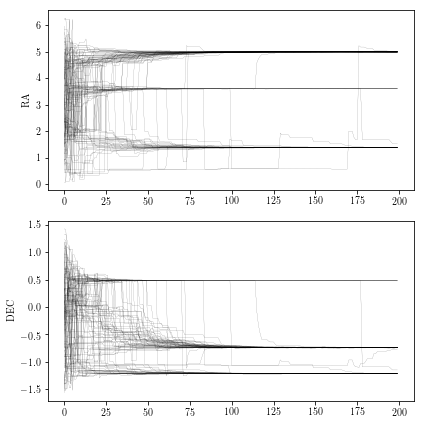

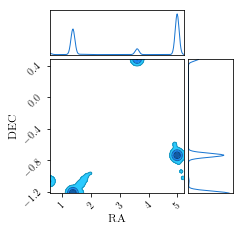

nsamples: 10000
noise_logz: -27681.688
logz:    nan +/-    nan
log_bayes_factor:    nan +/-    nan

CPU times: user 1min 29s, sys: 1.12 s, total: 1min 30s
Wall time: 1min 29s


In [7]:
%%time 
result = tupak.sampler.run_sampler(
    likelihood, priors=priors, sampler='ptemcee', label='ptemcee',
    nwalkers=100, nsteps=200, nburn=100, ntemps=2,
    tqdm='tqdm_notebook')
fig = result.plot_corner(save=False)
plt.show()
print(result)